Сделать квантовую телепортацию по схеме

Результаты измерений: {'00': 258, '11': 233, '01': 268, '10': 265}


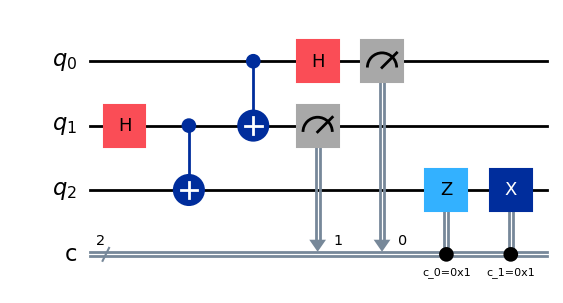

In [ ]:
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit, transpile

# Создание квантовой схемы с 3 кубитами и 2 классическими битами
qc = QuantumCircuit(3, 2)

# Создание пары Белла между вторым и третьим кубитами (q1 и q2)
qc.h(1)       # Адамар на q1
qc.cx(1, 2)   # CNOT: q1 (контроль) -> q2 (цель)

# Телепортация состояния q0 -> q2
qc.cx(0, 1)   # CNOT: q0 (контроль) -> q1 (цель)
qc.h(0)       # Адамар на q0

# Измерение q0 и q1
qc.measure(0, 0)  # Измеряем q0 в классический бит 0
qc.measure(1, 1)  # Измеряем q1 в классический бит 1

# Применение операторов коррекции на q2
qc.z(2).c_if(0, 1)  # Применяем Z, если бит 0 равен 1
qc.x(2).c_if(1, 1)  # Применяем X, если бит 1 равен 1

# Симуляция схемы
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit).result()

# Результаты измерений
counts = result.get_counts()
print("Результаты измерений:", counts)

# Визуализация схемы и гистограммы
qc.draw(output='mpl')
# plot_histogram(counts)


А теперь QuantumZ Z V ZOV ЭТО ПОБЕДА

In [ ]:
from quantumz import *
from math import pi
# это буквально пример из методы
q = initq(1) # инициируем нулевое одночастичное состояние
q = U(q, 0, pi/5, pi, 8*pi/7-pi, 3)
# {'|0>': (0.809+0j), '|1>': (0.53+0.255j)}
# тут пара бела
q2 = initq(2)
q2 = H(q2,0)
q2 = CX(q2, [0], 1)
# только здесь сама схема рис.1
q3 = common(q, q2)
q3 = CX(q3, [0], 1)
q3 = H(q3, 0)
measures = multi_measure(q3, [0, 1])[1]
for k in measures.keys():
    k1, k2 = int(k[1]), int(k[2])
    if k2:
        measures[k] = X(measures[k], 0)
    if k1:
        measures[k] = Z(measures[k], 0)
measures


{'|00>': {'|0>': (0.8088358229902085+0j),
  '|1>': (0.5298924427500747+0.2549482507571114j)},
 '|10>': {'|0>': (0.80884+0j), '|1>': (0.52989+0.25495j)},
 '|01>': {'|0>': (0.80884+0j), '|1>': (0.52989+0.25495j)},
 '|11>': {'|0>': (0.80884+0j), '|1>': (0.52989+0.25495j)}}